<a href="https://colab.research.google.com/github/SkyJoyTianle/python/blob/master/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 第三章


例　59

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn-ticks")

In [2]:
def Hermite(j):
    if j == 0:
      return [1]
    a = [0] * (j + 2)
    b = [0] * (j + 2)
    a[0] = 1
    for i in range(1, j + 1):
      b[0] = -a[1]
      for k in range(i + 1):
        b[k] = 2 * a[k - 1] - (k + 1) * a[k + 1]
      for h in range(j + 2):
          a[h] = b[h]
    return b[:(j+1)]

In [3]:
Hermite(2)

[-2, 0, 4]

In [4]:
Hermite(3)

[0, -12, 0, 8]

In [5]:
Hermite(4)

[12, 0, -48, 0, 16]

In [6]:
def H(j, x):
    coef = Hermite(j)
    S = 0
    for i in range(j + 1):
      S = S + np.array(coef[i]) * (x ** i)
    return S

Text(0.5, 1.0, 'Characteristic function of Gauss Kernel')

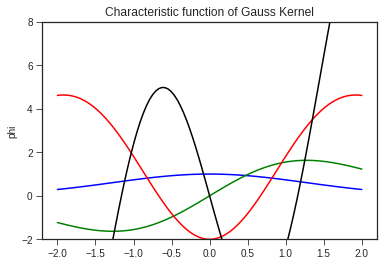

In [7]:
cc = np.sqrt(5) / 4
a = 1/4

def phi(j, x):
  return np.exp(-(cc - a) * x**2) * H(j, np.sqrt(2 * cc) * x)

color = ["b", "g", "r", "k"]
p = [[] for _ in range(4)]
x = np.linspace(-2, 2, 100)
for i in range(4):
  for k in x:
    p[i].append(phi(i, k))
  plt.plot(x, p[i], c = color[i], label = "j = %d"%i)
plt.ylim(-2, 8)
plt.ylabel("phi")    
plt.title("Characteristic function of Gauss Kernel")

例 62

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


Text(0.5, 1.0, 'Eigen Values and their Eigen Functions')

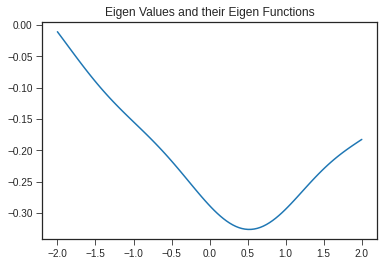

In [8]:
#Definition of kernel

sigma = 1
def k(x, y):
  return np.exp(-(x - y)**2 / sigma**2)

# generation of sample and matrix
m = 300
x = np.random.randn(m) - 2 * np.random.randn(m)**2 + 3 * np.random.randn(m)**3

#eigenvalue and eigenvector
K = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        K[i, j] = k(x[i], x[j])
values, vectors = np.linalg.eig(K)
lam = values / m
alpha = np.zeros((m, m))
for i in range(m):
    alpha[:, i] = vectors[i, :] * np.sqrt(m) / (values[i] + 10e-16)

#graph

def F(y, i):
  S = 0
  for j in range(m):
      S = S + alpha[j, i] * k(x[j], y)
  return S
i = 1
def G(y):
    return F(y,i)

w = np.linspace(-2, 2, 100)
plt.plot(w, G(w))
plt.title("Eigen Values and their Eigen Functions")

